In [ ]:
import random
import numpy as np
import importlib as imp

from copy import copy
from random import randint
from datetime import datetime
from itertools import combinations
from tqdm import tqdm, tqdm_notebook

In [ ]:
import sys
# Assuming 'tools', 'common', and other modules are in a subdirectory:
sys.path.append('/content/drive/MyDrive/PERkuliAHAN/DATASET/algorithm')
sys.path.append('/content/drive/MyDrive/PERkuliAHAN/DATASET/utils') # Change "folder_containing_modules" to the subdirectory name

import tools
import common
import visualize
import base
import neighbor_operator
import local_search
import bee_colony


In [ ]:
import abc as ABC
from abc import ABC, abstractmethod, abstractproperty


class Algorithm(ABC):

    @abstractmethod
    def solve(self):
        pass

    @abstractproperty
    def name(self):
        pass

In [ ]:
import random
import numpy as np
from copy import copy
from utils import tools
from random import randint
from utils import common
from itertools import combinations


class NeighborOperator:

    def __init__(self):
        self.operators = {
                          1: self.random_swap,
                          2: self.random_swap_sub,
                          # 3: self.random_insert,
                          # 4: self.random_insert_sub,
                          5: self.random_reversing,
                          6: self.random_swap_sub_reverse,
                          7: self.random_insert_sub_reverse
                          }
        pass


    def random_operator(self, _solution, patience=10, verbose=False):
        operators = list(self.operators)
        # p = [p / sum(operators) for p in operators]
        p = None
        rand_choice = np.random.choice(operators, p=p)
        random_oper = self.operators[rand_choice]
        return random_oper(_solution, patience=patience, verbose=verbose)

    @staticmethod
    def random_swap(_solution, patience=10, verbose=False):
        if verbose:
            print('random swap')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            i, j = random.sample(range(1, sol_len-1), 2)
            if i != j and solution[i] != 0 and solution[j] != 0:
                solution[i], solution[j] = copy(solution[j]), copy(solution[i])
                break
            patience -= 1
        return solution

    @staticmethod
    def random_swap_sub(_solution, patience=10, verbose=False):
        if verbose:
            print('random swap of subsequence')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            k = random.choice(range(2, 7))
            i, j = random.sample(range(1, sol_len-k-1), 2)
            if abs(i-j)>k and solution[i] != 0 and solution[j] != 0:
                if verbose:
                    print('Swap: ', solution[i:i+k], solution[j:j+k])
                solution[i:i+k], solution[j:j+k] = copy(solution[j:j+k]), copy(solution[i:i+k])

                # there shouldn`t be several depots in a row for example [0, 0,.. ]
                if common.check_depots_sanity(solution):
                    break
            patience -= 1

        return solution

    @staticmethod
    def random_insert(_solution, patience=10, verbose=False):
        if verbose:
            print('random insertion')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            i, j = random.sample(range(1, sol_len-1), 2)
            if i != j and solution[i] != 0 and solution[j] != 0:
                i, j = copy(min(i, j)), copy(max(i, j))
                if solution[j+1] != 0 or solution[j-1]!=0:
                    solution[:i] = _solution[:i]
                    solution[i]  = _solution[j]
                    solution[i+1:j+1] = _solution[i:j]
                    solution[j+1:]    = _solution[j+1:]
                    break
            patience -= 1

        return solution

    @staticmethod
    def random_insert_sub(_solution, patience=10, verbose=False):
        if verbose:
            print('random insertion of subsequence')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            k = random.choice(range(2, 7))
            i, j = random.sample(range(1, sol_len-k-1), 2)
            if abs(i-j) <= k:
                continue
            i, j = copy(min(i, j)), copy(max(i, j))
            if verbose:
                print('Insert: ',_solution[j:j+k], 'to', i, i+k)
            solution[:i] = _solution[:i]
            solution[i:i+k]  = _solution[j:j+k]
            solution[i+k:j+k] = _solution[i:j]
            solution[j+k:]  = _solution[j+k:]

            # there shouldn`t be several depots in a row for example [0, 0,.. ]
            if common.check_depots_sanity(solution):
                break
            patience -= 1

        return solution

    @staticmethod
    def random_reversing(_solution, patience=10, verbose=False):
        if verbose:
            print('random reversing a subsequence')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            i, j = random.sample(range(1, sol_len-1), 2)
            if i != j:
                i, j = copy(min(i, j)), copy(max(i, j))
                if  solution[j+1] != 0  and solution[i-1] != 0:
                    solution[i:j] = solution[i:j][::-1]
                    break
            patience -= 1
        return solution

    @staticmethod
    def random_swap_sub_reverse(_solution, patience=10, verbose=False):
        if verbose:
            print('random swap of reversed subsequence')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            k = random.choice(range(2, 7))
            i, j = random.sample(range(1, sol_len-k-1), 2)
            if abs(i-j)>k and solution[i] != 0 and solution[j] != 0:
                if verbose:
                    print('Swap: ', solution[i:i+k], solution[j:j+k])
                solution[i:i+k], solution[j:j+k] = copy(solution[j:j+k][::-1]), copy(solution[i:i+k][::-1])

                # there shouldn`t be several depots in a row for example [0, 0,.. ]
                if common.check_depots_sanity(solution):
                    break
            patience -= 1

        return solution

    @staticmethod
    def random_insert_sub_reverse(_solution, patience=10, verbose=False):
        if verbose:
            print('random insertion of subsequence')
        solution = copy(_solution)
        sol_len  = len(solution)
        while patience > 0:
            k = random.choice(range(2, 7))
            i, j = random.sample(range(1, sol_len-k-1), 2)
            if abs(i-j) <= k:
                continue
            i, j = copy(min(i, j)), copy(max(i, j))
            if verbose:
                print('Insert: ',_solution[j:j+k], 'to', i, i+k)
            solution[:i] = _solution[:i]
            solution[i:i+k]  = _solution[j:j+k][::-1]
            solution[i+k:j+k] = _solution[i:j]
            solution[j+k:]  = _solution[j+k:]

            # there shouldn`t be several depots in a row for example [0, 0,.. ]
            if common.check_depots_sanity(solution):
                break
            patience -= 1

        return solution

In [ ]:
import random
import numpy as np
from copy import copy
from random import randint
import importlib as imp
from itertools import combinations
from tqdm import tqdm, tqdm_notebook

from utils import tools, common
from algorithm import neighbor_operator
from algorithm.base import Algorithm
neighbor_operator = imp.reload(neighbor_operator)



class LocalSearch(Algorithm):

    def __init__(self, problem):
        self.problem = problem

    @property
    def name(self):
        return 'LocalSearch'


    def set_params(self, solution, n_iter, **params):
        self.solution = copy(solution)
        self.n_iter   = n_iter
        self.params   = params


    def solve(self, only_feasible=True, verbose=False):
        self.cur_cost = common.compute_solution(self.problem, self.solution)
        if verbose:
            print('Start cost: {}'.format(self.cur_cost))

        feasible_saving = copy(self.solution)
        operator = neighbor_operator.NeighborOperator()

        for _ in tqdm(range(self.n_iter), disable=(not verbose)):
            tmp_sol = operator.random_operator(self.solution)
            cost = common.compute_solution(self.problem, tmp_sol)
            if self.cur_cost >= cost:
                self.cur_cost = cost
                self.solution = tmp_sol
                if common.check_solution(self.problem, self.solution):
                    feasible_saving = copy(self.solution)

        if ((only_feasible) and
            (not common.check_solution(self.problem, self.solution))):
            self.solution = feasible_saving
            self.cur_cost = common.compute_solution(self.problem,
                                                    self.solution)
        return self.solution, self.cur_cost

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import importlib as imp
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_columns = 100

In [ ]:
from utils import tools, visualize, common
bname = '/content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/A/A-n32-k5.vrp'
problem = tools.get_problem(bname)

n_trucks -> 5
optimal -> 784
capacity -> 100
n_locations -> 32
depot_i -> 0
demands -> [0.0, 19.0, 21.0, 6.0, 19.0, 7.0, 12.0, 16.0, 6.0, 16.0, 8.0, 14.0, 21.0, 16.0, 3.0, 22.0, 18.0, 19.0, 1.0, 24.0, 8.0, 12.0, 4.0, 8.0, 24.0, 24.0, 2.0, 20.0, 15.0, 2.0, 14.0, 9.0]


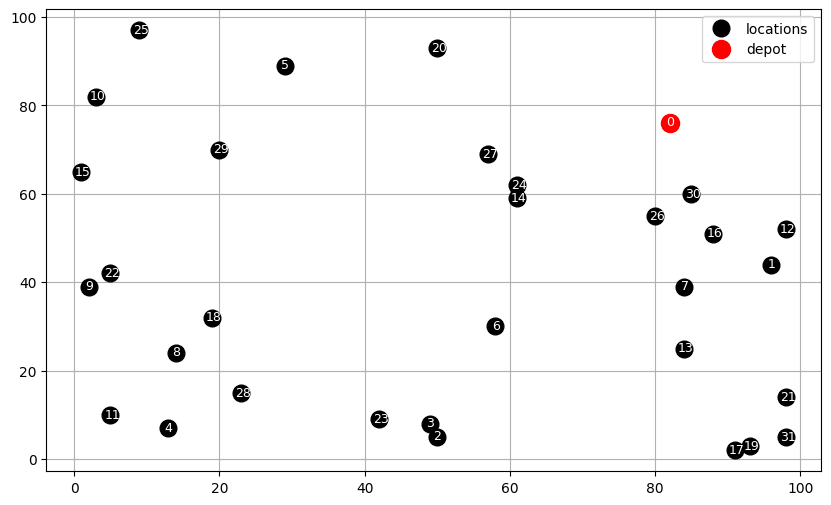

In [ ]:
tools     = imp.reload(tools)
visualize = imp.reload(visualize)
common    = imp.reload(common)

visualize.visualize_problem(problem)
for k, v in problem.items():
    if k !='locations' and k !='dists':
        print(k,"->", v)
plt.savefig('/content/drive/MyDrive/PERkuliAHAN/DATASET/output/images/problem'+bname[-10:]+'.png', dpi=400)

In [ ]:
common   = imp.reload(common)
solution = common.generate_solution(problem, alpha=0.01, betta=50, verbose=False)
print('Is feasible? {}'.format(common.check_solution(problem, solution, verbose=True)))
sol_cost = common.compute_solution(problem, solution)
print('Solution cost:', sol_cost)
solution

Is feasible? True
Solution cost: 1249.1293


array([ 0, 29, 18, 22, 15, 10, 11,  9,  8,  4,  0,  5, 25,  0, 21, 17, 13,
       19, 31, 28,  0, 12, 26,  1,  7, 30, 24,  0, 27, 14, 20,  2, 23,  3,
        6, 16,  0], dtype=int32)

In [ ]:
from algorithm import bee_colony, local_search, neighbor_operator
bee_colony = imp.reload(bee_colony)
local_search = imp.reload(local_search)
neighbor_operator = imp.reload(neighbor_operator)
common = imp.reload(common)


ABC = bee_colony.BeeColony(problem)
ABC.set_params(
                   n_epoch=1000,
                   n_initials=30,
                   n_onlookers=15,
                   search_limit=200
              )
%time abc_solution = ABC.solve(alpha=0.1, delta=0.01, gen_alpha=0.01, gen_betta=25)

  0%|          | 0/1000 [00:00<?, ?it/s]

Tries:  14
CPU times: user 2min 38s, sys: 1.65 s, total: 2min 40s
Wall time: 2min 42s


In [ ]:
new_cost = common.compute_solution(problem, abc_solution)
print('Is feasible?',common.check_solution(problem, abc_solution, verbose=True))
print('Is capacity?',common.check_capacity_criteria(problem, abc_solution, verbose=False))
print('ABC cost: {}'.format(new_cost))
print('Optimal cost: {}'.format(problem['optimal']))

Is feasible? True
Is capacity? True
ABC cost: 787.081787109375
Optimal cost: 784


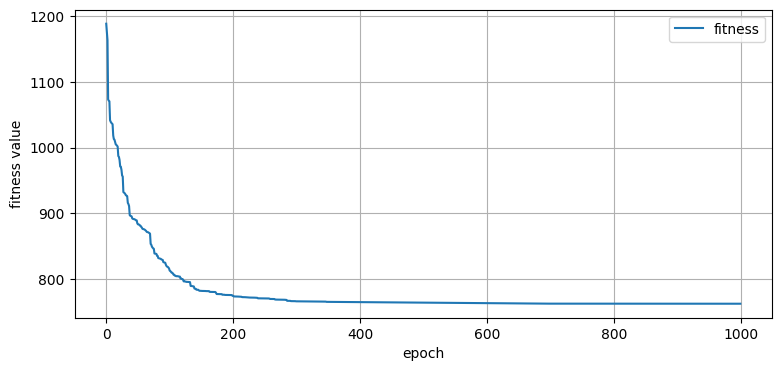

In [ ]:
visualize = imp.reload(visualize)
visualize.visualize_fitness(ABC.history)
plt.savefig('/content/drive/MyDrive/PERkuliAHAN/DATASET/output/images/history_'+bname[-10:]+'.png', dpi=400)

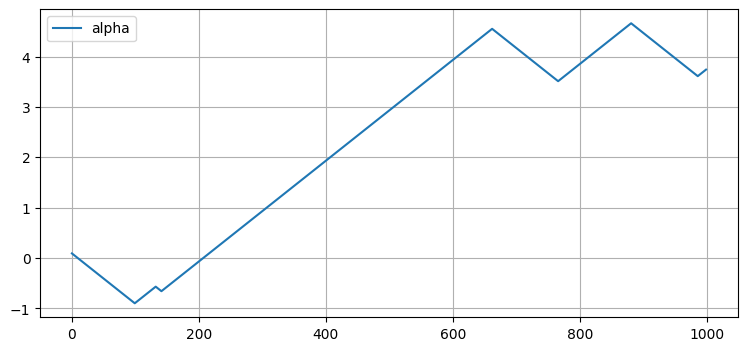

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(ABC.history_alpha, label='alpha')
plt.legend()
plt.grid()
plt.show()

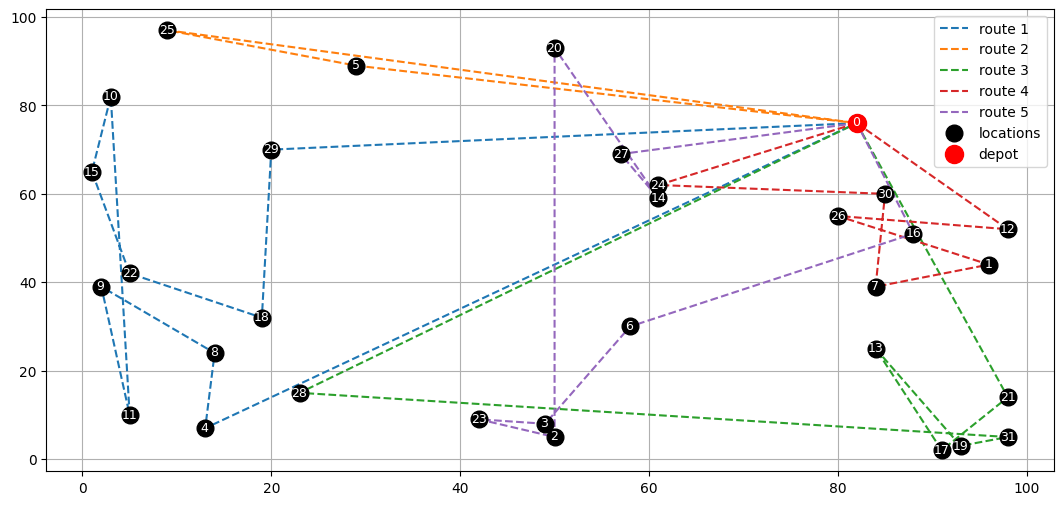

In [ ]:
visualize.visualize_problem(problem, solution, figsize=(13,6))
plt.savefig('/content/drive/MyDrive/PERkuliAHAN/DATASET/output/images/beforeABC_'+bname[-10:]+'.png', dpi=400)

Route #1 [ 6  3  2 23  4 11 28 14]
Route #2 [27 24]
Route #3 [26  7 13 17 19 31 21]
Route #4 [18  8  9 22 15 29 10 25  5 20]
Route #5 [12  1 16 30]


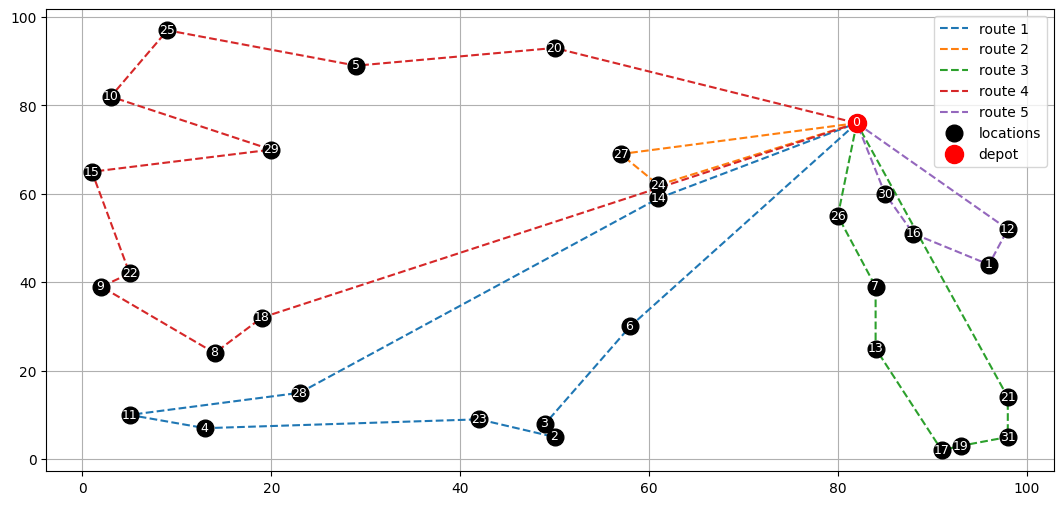

In [ ]:
visualize.visualize_problem(problem, abc_solution, figsize=(13,6))
depots = list(filter(lambda i: abc_solution[i]==0, range(len(abc_solution))))
for i, route in  enumerate(common.get_routes(abc_solution)):
    print('Route #{}'.format(i+1),route)
# len(abc_solution), len(np.unique(abc_solution))
plt.savefig('/content/drive/MyDrive/PERkuliAHAN/DATASET/output/images/afterABC_'+bname[-10:]+'.png', dpi=400)

# B-**benchmarks**

In [ ]:
%%time
import glob
from datetime import datetime
tools     = imp.reload(tools)
bee_colony = imp.reload(bee_colony)
local_search = imp.reload(local_search)
common = imp.reload(common)
neighbor_operator = imp.reload(neighbor_operator)



b_benchmarks = glob.glob('/content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/*.vrp')


info_dct = dict(benchmark=[],
                n_locations=[],
                n_trucks=[],
                capacity=[],
                optimal_cost=[],
                ABC_cost=[],
                ABC_time=[],
                is_feasible=[],
                error=[],
                abc_solution=[],
                abc_epochs=[],
                abc_employers=[],
                abc_onlookers=[],
                abc_search_limit=[])

for itr, benchmark in enumerate(b_benchmarks[:]):
    problem = tools.get_problem(benchmark)

    bench_name = benchmark[benchmark.index("/")+1:]
    print('#{}'.format(itr), bench_name,'...')

    ABC = bee_colony.BeeColony(problem)
    ABC.set_params(
                       n_epoch=300,
                       n_initials=problem['n_locations'],
                       n_onlookers=5,
                       search_limit=problem['n_locations']
                  )
    start_time = datetime.now()
    alpha = problem['n_locations'] / 100
    delta = 0.01
    gen_alpha = 0.5
    gen_betta = problem['n_locations']
    abc_solution = ABC.solve(alpha=alpha, delta=delta, gen_betta=gen_betta)
    end_time = (datetime.now() - start_time).total_seconds()

    abc_cost = common.compute_solution(problem, abc_solution)
    is_feasible = common.check_solution(problem, abc_solution, verbose=True)
    error = (abc_cost - problem['optimal']) / problem['optimal']
    print('epoch:',ABC.n_epoch, 'initials:', ABC.n_initials,'search_limit:', ABC.search_limit)


    info_dct['benchmark']    += [bench_name]
    info_dct['n_locations']  += [problem['n_locations']]
    info_dct['n_trucks']     += [problem['n_trucks']]
    info_dct['capacity']     += [problem['capacity']]
    info_dct['optimal_cost'] += [problem['optimal']]
    info_dct['ABC_cost']      += [abc_cost]
    info_dct['ABC_time']      += [end_time]
    info_dct['is_feasible']   += [is_feasible]
    info_dct['error']         += [error]
    info_dct['abc_solution']  += [abc_solution]
    info_dct['abc_epochs']    += [ABC.n_epoch]
    info_dct['abc_employers'] += [ABC.n_initials]
    info_dct['abc_onlookers'] += [ABC.n_onlookers]
    info_dct['abc_search_limit'] += [ABC.search_limit]

    print(alpha, delta, gen_betta)
    if not is_feasible:
        print('Does not feasible...')
        continue

    tools.write_solution(abc_solution, abc_cost, filename='/content/drive/MyDrive/PERkuliAHAN/DATASET/output/B/' + bench_name.split('/')[-1][:-4] + '.sol')

#0 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n39-k5.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  16
epoch: 300 initials: 39 search_limit: 39
0.39 0.01 39
#1 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n43-k6.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  14
epoch: 300 initials: 43 search_limit: 43
0.43 0.01 43
#2 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n45-k5.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  17
epoch: 300 initials: 45 search_limit: 45
0.45 0.01 45
#3 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n45-k6.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  1
epoch: 300 initials: 45 search_limit: 45
0.45 0.01 45
#4 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n51-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  27
epoch: 300 initials: 51 search_limit: 51
0.51 0.01 51
#5 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n50-k8.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  11
epoch: 300 initials: 50 search_limit: 50
0.5 0.01 50
#6 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n38-k6.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  23
epoch: 300 initials: 38 search_limit: 38
0.38 0.01 38
#7 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n44-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  5
epoch: 300 initials: 44 search_limit: 44
0.44 0.01 44
#8 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n41-k6.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  17
epoch: 300 initials: 41 search_limit: 41
0.41 0.01 41
#9 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n34-k5.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  17
epoch: 300 initials: 34 search_limit: 34
0.34 0.01 34
#10 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n50-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  35
epoch: 300 initials: 50 search_limit: 50
0.5 0.01 50
#11 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n35-k5.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  16
epoch: 300 initials: 35 search_limit: 35
0.35 0.01 35
#12 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n31-k5.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  19
epoch: 300 initials: 31 search_limit: 31
0.31 0.01 31
#13 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n52-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  18
epoch: 300 initials: 52 search_limit: 52
0.52 0.01 52
#14 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n78-k10.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  33
epoch: 300 initials: 78 search_limit: 78
0.78 0.01 78
#15 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n56-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  20
epoch: 300 initials: 56 search_limit: 56
0.56 0.01 56
#16 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n66-k9.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  19
epoch: 300 initials: 66 search_limit: 66
0.66 0.01 66
#17 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n57-k9.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  12
epoch: 300 initials: 57 search_limit: 57
0.57 0.01 57
#18 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n57-k7.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  25
epoch: 300 initials: 57 search_limit: 57
0.57 0.01 57
#19 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n63-k10.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  37
epoch: 300 initials: 63 search_limit: 63
0.63 0.01 63
#20 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n68-k9.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  44
epoch: 300 initials: 68 search_limit: 68
0.68 0.01 68
#21 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n64-k9.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  33
epoch: 300 initials: 64 search_limit: 64
0.64 0.01 64
#22 content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n67-k10.vrp ...


  0%|          | 0/300 [00:00<?, ?it/s]

Tries:  17
epoch: 300 initials: 67 search_limit: 67
0.67 0.01 67
CPU times: user 27min 19s, sys: 10.2 s, total: 27min 29s
Wall time: 28min 3s


In [ ]:
b_stat = pd.DataFrame.from_dict(info_dct)
columns = ['benchmark', 'n_locations', 'n_trucks', 'capacity', 'optimal_cost', 'ABC_cost', 'ABC_time', 'error', 'is_feasible']
print(b_stat[columns].to_markdown())

|    | benchmark                                                            |   n_locations |   n_trucks |   capacity |   optimal_cost |   ABC_cost |   ABC_time |     error | is_feasible   |
|---:|:---------------------------------------------------------------------|--------------:|-----------:|-----------:|---------------:|-----------:|-----------:|----------:|:--------------|
|  0 | content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n39-k5.vrp  |            39 |          5 |        100 |            549 |    566.89  |    42.3669 | 0.0325864 | True          |
|  1 | content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n43-k6.vrp  |            43 |          6 |        100 |            742 |    863.338 |    53.7322 | 0.163528  | True          |
|  2 | content/drive/MyDrive/PERkuliAHAN/DATASET/benchmarks/B/B-n45-k5.vrp  |            45 |          5 |        100 |            751 |    796.994 |    52.9241 | 0.0612443 | True          |
|  3 | content/drive/MyDrive/PERkuliAHAN/DATA